In [56]:
import yfinance as yf
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import datetime

In [52]:
from google.colab import files
uploaded = files.upload()

Saving SP500.csv to SP500.csv


In [53]:
data_table = pd.read_csv('SP500.csv')

tickers = data_table['Symbol'].str.strip()

companies_dict = {}

for index, row in data_table.iterrows():
    companies_dict[row['Symbol']] = row['Security']

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [62]:
start_date = '2021-11-01'
end_date = '2024-11-01'

panel_data = yf.download(tickers.tolist(), start=start_date, end=end_date)

[*********************100%***********************]  505 of 505 completed
ERROR:yfinance:
33 Failed downloads:
ERROR:yfinance:['TWTR', 'VIAC', 'PXD', 'XLNX', 'FLT', 'ABMD', 'ATVI', 'BLL', 'PKI', 'WLTW', 'ANTM', 'CTXS', 'GPS', 'FB', 'FRC', 'DISCA', 'KSU', 'ABC', 'BRK.B', 'DRE', 'FBHS', 'SIVB', 'CDAY', 'DISH', 'NLSN', 'NLOK', 'RE', 'PEAK', 'DISCK', 'PBCT', 'CERN', 'WRK']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2021-11-01 -> 2024-11-01)')


In [63]:
panel_data.head()

Price                       Adj Close                                     \
Ticker                              A        AAL         AAP        AAPL   
Date                                                                       
2021-11-01 00:00:00+00:00  153.922012  19.770000  208.111740  146.345673   
2021-11-02 00:00:00+00:00  154.696243  19.830000  209.646378  147.387085   
2021-11-03 00:00:00+00:00  155.039230  20.629999  213.519989  148.831253   
2021-11-04 00:00:00+00:00  154.500214  20.629999  212.715668  148.310562   
2021-11-05 00:00:00+00:00  153.285034  21.820000  212.382874  148.841858   

Price                                                                   \
Ticker                           ABBV ABC ABMD         ABT         ACN   
Date                                                                     
2021-11-01 00:00:00+00:00  102.468109 NaN  NaN  121.892441  339.596497   
2021-11-02 00:00:00+00:00  104.003220 NaN  NaN  120.729675  345.502991   
2021-11-03 00:00:00+00:00  104.931404 NaN  NaN  121.665550  346.076447   
2021-11-04 00:00:00+00:00  104.476250 NaN  NaN  122.034256  350.568451   
2021-11-05 00:00:00+00:00  104.583328 NaN  NaN  117.572220  352.155060   

Price                                  ...   Volume                          \
Ticker                           ADBE  ...      XEL XLNX       XOM     XRAY   
Date                                   ...                                    
2021-11-01 00:00:00+00:00  640.200012  ...  2502400  NaN  19656400  1112000   
2021-11-02 00:00:00+00:00  640.400024  ...  2395400  NaN  16300000  1588900   
2021-11-03 00:00:00+00:00  655.179993  ...  2397000  NaN  17372800  1407100   
2021-11-04 00:00:00+00:00  674.080017  ...  5254700  NaN  17720100  3401000   
2021-11-05 00:00:00+00:00  662.719971  ...  4477200  NaN  18565100  2829000   

Price                                                                           
Ticker                         XYL      YUM      ZBH    ZBRA     ZION      ZTS  
Date                                                                            
2021-11-01 00:00:00+00:00   600200  1239900  1176672  370200  1344000  1323900  
2021-11-02 00:00:00+00:00  1085600  1296700   910932  564200  1014200  2760900  
2021-11-03 00:00:00+00:00   830000  1486700  1450034  401700  1670700  2225300  
2021-11-04 00:00:00+00:00   625800  1146800  3757440  382700  1537600  1947300  
2021-11-05 00:00:00+00:00   700800  1187800  3066413  328300  1064800  1728000  

[5 rows x 3030 columns]

In [65]:
panel_data = panel_data.fillna(0)
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[-1])

Ticker
A       130.309998
AAL      13.400000
AAP      35.689999
AAPL    225.910004
ABBV    203.869995
           ...    
YUM     131.160004
ZBH     106.919998
ZBRA    381.970001
ZION     52.060001
ZTS     178.779999
Name: 2024-10-31 00:00:00+00:00, Length: 505, dtype: float64


In [66]:
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [68]:
movmts = []
for i in range(0, len(companies)):
    print('Company: {}, Ticker: {}, Change: {}'.format(companies[i][0],companies[i][1], sum(movements[i][:])))
    movmts.append([companies[i][0],companies[i][1], sum(movements[i][:])])

Company: MMM, Ticker: 3M, Change: -29.79998779296875
Company: AOS, Ticker: A. O. Smith, Change: -7.780014991760254
Company: ADM, Ticker: ADM, Change: -59.06999969482422
Company: AES, Ticker: AES Corp, Change: 124.94998168945312
Company: APA, Ticker: APA Corporation, Change: 107.9701156616211
Company: T, Ticker: AT&T, Change: 0.0
Company: ABBV, Ticker: AbbVie, Change: 0.0
Company: ABT, Ticker: Abbott Laboratories, Change: 4.93017578125
Company: ABMD, Ticker: Abiomed, Change: 90.48011779785156
Company: ACN, Ticker: Accenture, Change: -73.69046020507812
Company: ATVI, Ticker: Activision Blizzard, Change: 23.850067138671875
Company: ADBE, Ticker: Adobe, Change: -28.56009292602539
Company: AAP, Ticker: Advance Auto Parts, Change: 7.5601348876953125
Company: AMD, Ticker: Advanced Micro Devices, Change: 0.7602691650390625
Company: AFL, Ticker: Aflac, Change: -14.08001708984375
Company: A, Ticker: Agilent Technologies, Change: -5.5999603271484375
Company: APD, Ticker: Air Products & Chemicals,

In [69]:
movmts_df = pd.DataFrame(movmts, columns=['Company', 'Symbol', 'Movement'])
movmts_df

,Company,Symbol,Movement
0,MMM,3M,-29.799988
1,AOS,A. O. Smith,-7.780015
2,ADM,ADM,-59.070000
3,AES,AES Corp,124.949982
4,APA,APA Corporation,107.970116
...,...,...,...
500,ZBRA,Zebra Technologies,-4.279930
501,ZBH,Zimmer Biomet,-20.410835
502,ZION,Zions Bancorp,-77.550446
503,ZTS,Zoetis,-2.190010


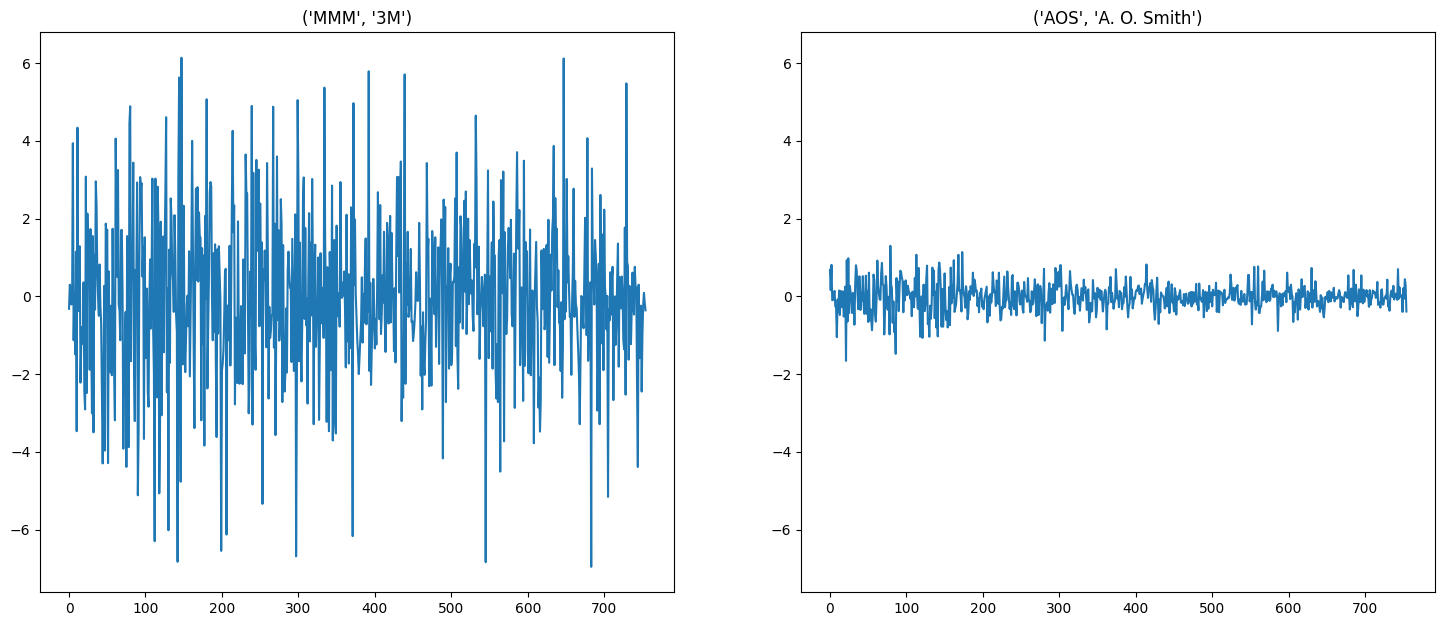

In [70]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [71]:
movements
where_are_NaNs = np.isnan(movements)
movements[where_are_NaNs] = 0
movements

array([[-0.32000732,  0.30000305,  0.16999817, ...,  0.08999634,
        -0.16999817, -0.36000061],
       [ 0.68000031,  0.15999985,  0.80999947, ...,  0.43999958,
         0.27999973, -0.39000034],
       [-1.17999268,  1.68000793,  4.24000549, ..., -0.98000336,
        -0.13000107, -0.31000137],
       ...,
       [ 9.14001465, 35.64996338, -2.20001221, ..., -9.89001465,
         2.5300293 , -2.51998901],
       [ 0.6400032 , -0.08000183,  2.22999954, ..., -0.18999863,
         0.90000153, -0.65999985],
       [-2.22000122, -2.55999756, -0.77999878, ..., -0.73999023,
         2.82000732, -1.44000244]])

In [72]:
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.4335956701323596
-0.7871154115668667
-3.591977419343889e-05


In [73]:
normalizer = Normalizer()
kmeans = KMeans(n_clusters=10, max_iter=1000)
pipeline = make_pipeline(normalizer,kmeans)

In [74]:
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [76]:
labels = pipeline.predict(movements)
df = pd.DataFrame({'labels': labels, 'companies': companies})
df.head()

,labels,companies
0,9,"(MMM, 3M)"
1,0,"(AOS, A. O. Smith)"
2,0,"(ADM, ADM)"
3,3,"(AES, AES Corp)"
4,6,"(APA, APA Corporation)"


In [77]:
reduced_data = PCA(n_components = 2).fit_transform(new)
kmeans = KMeans(n_clusters=5)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

df = pd.DataFrame({'labels': labels, 'companies': companies})

print(df.sort_values('labels'))

     labels                   companies
126       0       (COP, ConocoPhillips)
415       0              (SNA, Snap-on)
147       0  (FANG, Diamondback Energy)
411       0           (NOW, ServiceNow)
280       0           (LW, Lamb Weston)
..      ...                         ...
257       4        (IRM, Iron Mountain)
249       4               (INTC, Intel)
248       4        (IR, Ingersoll Rand)
323       4        (MS, Morgan Stanley)
504       4                (EBAY, eBay)

[505 rows x 2 columns]


In [78]:
movmts_df['Cluster'] = labels
movmts_df.sort_values('Company')

,Company,Symbol,Movement,Cluster
15,A,Agilent Technologies,-5.599960,0
31,AAL,American Airlines Group,-19.359695,2
12,AAP,Advance Auto Parts,7.560135,4
46,AAPL,Apple,0.000000,2
6,ABBV,AbbVie,0.000000,2
...,...,...,...,...
499,YUM,Yum! Brands,-47.589928,4
501,ZBH,Zimmer Biomet,-20.410835,2
500,ZBRA,Zebra Technologies,-4.279930,4
502,ZION,Zions Bancorp,-77.550446,1


In [79]:
data_df = pd.DataFrame(reduced_data, columns=["PC 1", "PC 2"])
print(data_df.shape)
data_df.head(10)

(505, 2)


,PC 1,PC 2
0,0.117823,0.206867
1,0.296785,-0.139864
2,0.037539,-0.053356
3,0.269299,0.208155
4,-0.378537,0.033247
5,-0.129860,0.040256
6,-0.129860,0.040256
7,-0.127868,0.251791
8,0.180647,0.284041
9,0.354659,0.362263


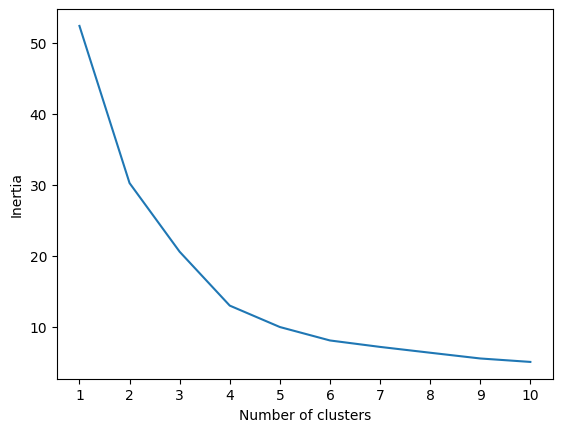

In [80]:
distortions=[]
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(reduced_data)
    distortions.append(sum(np.min(cdist(reduced_data, km.cluster_centers_, 'euclidean'), axis=1)) / new.shape[0])
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()